<a href="https://colab.research.google.com/github/yazmrt/CS464_Project/blob/main/ML_first_draft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer ,  MinMaxScaler , StandardScaler
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.model_selection import GridSearchCV

# Import Dataset

In [21]:
url_test = 'https://raw.githubusercontent.com/yazmrt/CS464_Project/main/datasets/test.csv'
url_train = 'https://raw.githubusercontent.com/yazmrt/CS464_Project/main/datasets/train.csv'
url_submission = 'https://raw.githubusercontent.com/yazmrt/CS464_Project/main/datasets/sample_submission.csv'
test = pd.read_csv(url_test)
train = pd.read_csv(url_train)
submission = pd.read_csv(url_submission)

#EDA

In [309]:
train.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [310]:
train.info()
#There are some numerical vales and some categorical values which we need to take care
train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


(381109, 12)

In [311]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
sns.countplot(train.Response)

sns.countplot(x='Gender', hue='Response', data=train)
plt.title('Count of Interested and Not Interested Customers by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(x='Age', hue='Response', data=train, kde=True)
plt.title('Distribution of Age for Interested and Not Interested Customers')
plt.show()
sns.countplot(train.Previously_Insured)

In [ ]:
train.Response.value_counts()

Response
0    334399
1     46710
Name: count, dtype: int64

In [ ]:
train.Response.value_counts(normalize=True)

Response
0    0.877437
1    0.122563
Name: proportion, dtype: float64

# Preprocessing

In [4]:
train['Gender'] = OneHotEncoder().fit_transform(train[['Gender']]).toarray()
train['Vehicle_Age'] = OneHotEncoder().fit_transform(train[['Vehicle_Age']]).toarray()
train['Vehicle_Damage'] = OneHotEncoder().fit_transform(train[['Vehicle_Damage']]).toarray()
for col in train.columns:
    train[col] = train[col].astype(np.int32)

test['Gender'] = OneHotEncoder().fit_transform(test[['Gender']]).toarray()
test['Vehicle_Age'] = OneHotEncoder().fit_transform(test[['Vehicle_Age']]).toarray()
test['Vehicle_Damage'] = OneHotEncoder().fit_transform(test[['Vehicle_Damage']]).toarray()
for col in test.columns:
    test[col] = test[col].astype(np.int32)
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,0,44,1,28,0,0,0,40454,26,217,1
1,2,0,76,1,3,0,1,1,33536,26,183,0
2,3,0,47,1,28,0,0,0,38294,26,27,1
3,4,0,21,1,11,1,0,1,28619,152,203,0
4,5,1,29,1,41,1,0,1,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,0,74,1,26,1,1,1,30170,26,88,0
381105,381106,0,30,1,37,1,0,1,40016,152,131,0
381106,381107,0,21,1,30,1,0,1,35118,160,161,0
381107,381108,1,68,1,14,0,0,0,44617,124,74,0


In [ ]:
for col in train.columns:
    if col == 'Response':
        continue
    print(col, train[col].corr(train['Response']))

id -0.001368150190218534
Gender -0.05243991377134205
Age 0.11114689471251019
Driving_License 0.01015517459407371
Region_Code 0.01056985561522313
Previously_Insured -0.34117046261352385
Vehicle_Age 0.1643167324619414
Vehicle_Damage -0.35439954387975453
Annual_Premium 0.022574695542560037
Policy_Sales_Channel -0.139041500829161
Vintage -0.0010503720019898887


In [5]:
# Separate features and target variable
X_train, X_test, y_train, y_test = train_test_split(train.drop(columns=["Response"]), train["Response"], test_size=0.2, random_state=72)

# Concatenate the features and target variable separately for train and test sets
train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)
train

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
329588,329589,0,23,1,43,0,0,0,30775,151,176,0
256387,256388,0,21,1,37,0,0,0,24778,160,61,0
80469,80470,1,29,1,28,1,0,1,25909,152,139,0
208040,208041,0,41,1,19,0,1,0,34309,124,299,0
220234,220235,0,47,1,35,0,1,0,2630,124,157,0
...,...,...,...,...,...,...,...,...,...,...,...,...
199493,199494,1,30,1,21,1,0,1,36344,152,77,0
216933,216934,0,61,1,29,1,1,1,27822,160,12,0
70702,70703,1,40,1,28,0,1,0,30521,124,291,0
325395,325396,1,23,1,30,1,0,1,30381,152,214,0


In [286]:
# Upsampling
#set the minority class to a seperate dataframe
df_1 = train[train['Response'] == 1]
#set other classes to another dataframe
other_df = train[train['Response'] != 1]
#upsample the minority class
df_1_upsampled = resample(df_1,random_state=77,n_samples=len(other_df),replace=True)#concatenate the upsampled dataframe
train = pd.concat([df_1_upsampled,other_df])
#train

# Downsampling
# other_df_down = resample(other_df,
#                                 replace=False,  # Sample without replacement
#                                 n_samples=len(df_1),  # Match number of minority class
#                                 random_state=42)  # Reproducible results
# train = pd.concat([other_df_down, df_1])




In [6]:
train = train.drop(columns="id")
train = train.drop(columns="Vintage")
train = train.drop(columns="Driving_License")
train = train.drop(columns="Region_Code")
test = test.drop(columns="id")
test = test.drop(columns="Vintage")
test = test.drop(columns="Driving_License")
test = test.drop(columns="Region_Code")
submission = submission.drop(columns="id")

<Axes: title={'center': 'Checking Imbalance in Training Data Or Response'}, xlabel='Age', ylabel='Density'>

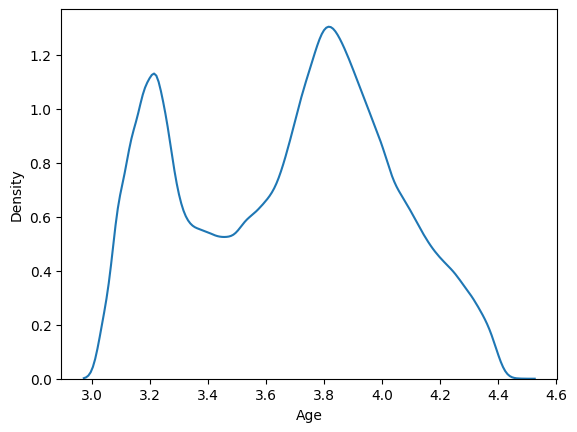

<Figure size 600x600 with 0 Axes>

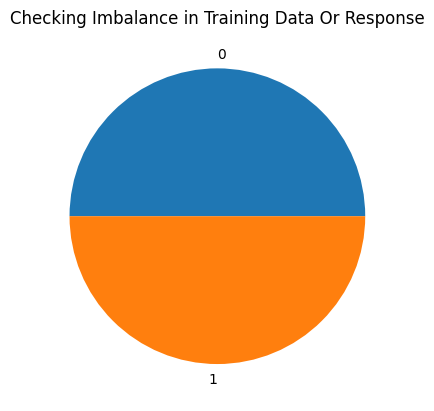

In [ ]:
sns.kdeplot(FunctionTransformer(func = np.log1p).fit_transform(train["Age"]))

response_data = train['Response'].value_counts()
plt.figure(figsize=(6,6))
fig, ax = plt.subplots()
ax.pie(response_data, labels = [0,1])
ax.set_title('Checking Imbalance in Training Data Or Response')

sns.kdeplot(train["Age"])

In [7]:
train = pd.concat([FunctionTransformer(func = np.log1p).fit_transform(train["Age"]) ,
                  train.drop("Age" , axis = 1)] ,axis = 1 , join = "inner")

train

,Age,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
329588,3.178054,0,0,0,0,30775,151,0
256387,3.091042,0,0,0,0,24778,160,0
80469,3.401197,1,1,0,1,25909,152,0
208040,3.737670,0,0,1,0,34309,124,0
220234,3.871201,0,0,1,0,2630,124,0
...,...,...,...,...,...,...,...,...
199493,3.433987,1,1,0,1,36344,152,0
216933,4.127134,0,1,1,1,27822,160,0
70702,3.713572,1,0,1,0,30521,124,0
325395,3.178054,1,1,0,1,30381,152,0


In [8]:
test = pd.concat([FunctionTransformer(func = np.log1p).fit_transform(test["Age"]) ,
                  test.drop("Age" , axis = 1)] ,
                axis = 1 , join = "inner")
test

,Age,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Response
22890,3.806662,0,0,1,1,2630,26,0
186498,3.218876,0,1,0,1,30691,152,0
155626,3.713572,0,0,1,1,42249,124,0
321516,3.044522,0,1,0,1,33389,160,0
152149,3.637586,0,0,1,0,31694,124,0
...,...,...,...,...,...,...,...,...
68381,3.496508,1,0,1,0,21139,154,0
343761,3.178054,0,1,0,1,34734,152,0
114761,3.761200,0,0,1,0,2630,154,0
233855,4.143135,0,1,1,1,50074,61,0


In [9]:
# Separate features and target variable
X = train.drop(columns=["Response"])
y = train["Response"]

X_test = test.drop(columns=["Response"])
y_test = test["Response"]

# X_test = test
# y_test = submission

# Apply one-hot encoding to categorical variables
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=77)

In [12]:
X_train

,Age,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel
346102,3.258097,0,0,0,0,19675,152
220358,3.401197,0,1,0,1,31001,152
305285,3.850148,0,0,0,0,31841,26
174441,3.828641,0,0,0,0,22397,124
344693,3.178054,0,1,0,1,30075,152
...,...,...,...,...,...,...,...
220932,3.526361,0,0,0,0,28763,160
267043,3.465736,0,0,1,0,29504,124
191837,4.317488,0,0,1,0,29480,124
148315,3.091042,1,0,0,0,51872,160


In [13]:
y_train

346102    1
220358    0
305285    0
174441    0
344693    0
         ..
220932    0
267043    0
191837    0
148315    0
118523    1
Name: Response, Length: 243909, dtype: int32

In [14]:
print('Positive cases % in validation set: ', round(100 * len(y_val[y_val == 1]) / len(y_val), 3), '%')
print('Positive cases % in train set: ', round(100 * len(y_train[y_train == 1]) / len(y_train), 3), '%')

Positive cases % in validation set:  12.162 %
Positive cases % in train set:  12.252 %


    Solver:
        'liblinear', 'newton-cg', 'lbfgs', 'sag', and 'saga'.
        'liblinear' is suitable for small to medium datasets and supports both L1 and L2 regularization.
        'newton-cg', 'lbfgs', 'sag', and 'saga' are suitable for large datasets and support only L2 regularization.

    Regularization:
        Regularization parameters like C control the strength of regularization in Logistic Regression.
        Lower values of C result in stronger regularization, which can help prevent overfitting but may lead to underfitting.
        Higher values of C reduce the strength of regularization, allowing the model to fit the training data more closely but may lead to overfitting.

In [15]:
class_weights = {0: 1, 1: 2}
model = LogisticRegression(random_state=77, class_weight=class_weights, solver='liblinear', C=1.0)

In [16]:
model = LogisticRegression(random_state=77, solver='liblinear', C=1.0)
model.fit(X_train, y_train)
y_predict = model.predict(X_val)


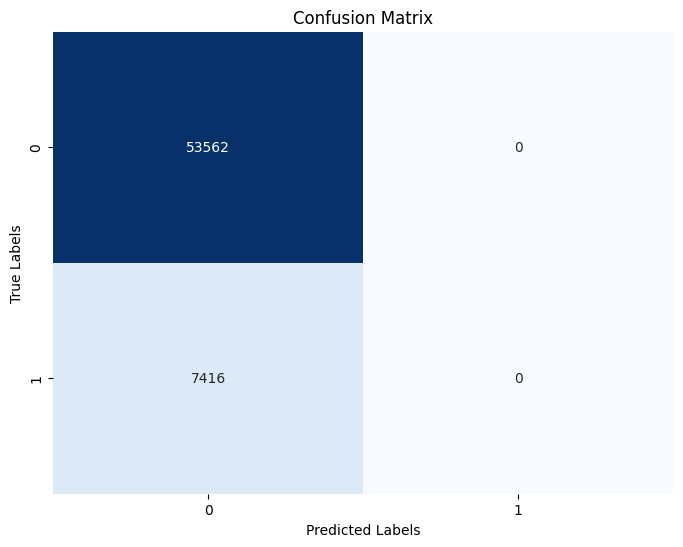

In [17]:
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_val, y_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
accuracy = metrics.accuracy_score(y_val, y_predict)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = metrics.f1_score(y_val, y_predict)
print("F1 Score:", f1)
# Calculate precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8783823674111975
F1 Score: 0.0
Precision: nan
Recall: 0.0


<ipython-input-18-4db138b6c73c>:8: RuntimeWarning: invalid value encountered in scalar divide
  precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])


Accuracy: 0.8765448295767626
F1 Score: 0.0


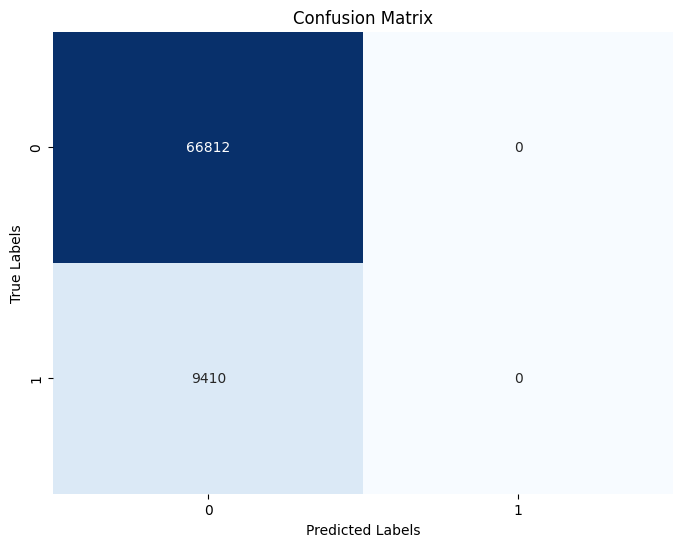

In [19]:
y_test_predict = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_test_predict)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = metrics.f1_score(y_test, y_test_predict)
print("F1 Score:", f1)
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_test, y_test_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()
#metrics.confusion_matrix(y_test, y_test_predict)
#metrics.classification_report(y_test, y_test_predict)

# Naive Bayes

In [19]:
from sklearn.naive_bayes import GaussianNB

In [20]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=77)

In [21]:
naive_model = GaussianNB()
naive_model.fit(X_train, y_train)
y_naive_predict = naive_model.predict(X_val)

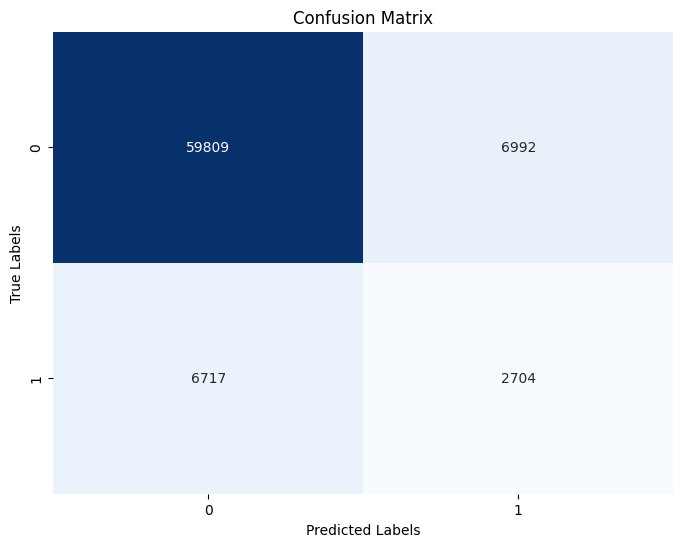

In [22]:
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_val, y_naive_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [23]:
accuracy = metrics.accuracy_score(y_val, y_naive_predict)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = metrics.f1_score(y_val, y_naive_predict)
print("F1 Score:", f1)
# Calculate precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8201437905066778
F1 Score: 0.28288957472406756
Precision: 0.27887788778877887
Recall: 0.2870183632310795


# Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=77)

In [28]:
forest_model=RandomForestClassifier(n_estimators=100,random_state=77)
forest_model.fit(X_train, y_train)
y_forest_predict = forest_model.predict(X_val)

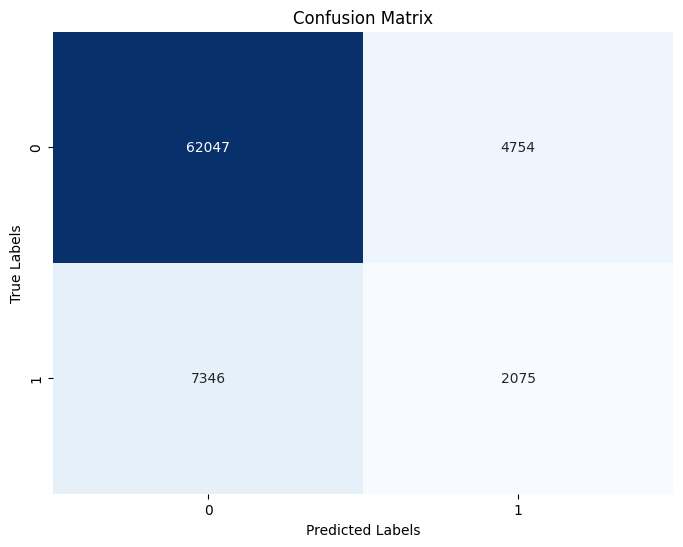

In [29]:
# Calculate confusion matrix
cm = metrics.confusion_matrix(y_val, y_forest_predict)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [30]:
accuracy = metrics.accuracy_score(y_val, y_forest_predict)
print("Accuracy:", accuracy)

# Calculate F1 score
f1 = metrics.f1_score(y_val, y_forest_predict)
print("F1 Score:", f1)
# Calculate precision
precision = cm[1, 1] / (cm[1, 1] + cm[0, 1])

# Calculate recall
recall = cm[1, 1] / (cm[1, 1] + cm[1, 0])

print("Precision:", precision)
print("Recall:", recall)

Accuracy: 0.8412531814961559
F1 Score: 0.2553846153846154
Precision: 0.30385122272660714
Recall: 0.22025262710964866


# Support Vector Machine

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [ ]:
param_grid = {'C': [0.1, 1]}

# Number of Monte Carlo iterations
n_iterations = 10
accuracy_scores = []

# Perform Monte Carlo cross-validation
for i in range(n_iterations):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Define SVM classifier
    svm_classifier = SVC(kernel='linear', random_state=42)

    # Perform grid search for best C value
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get best C value and evaluate on test set
    best_C = grid_search.best_params_['C']
    best_model = SVC(kernel='linear', C=best_C, random_state=42)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Calculate average accuracy across Monte Carlo iterations
average_accuracy = np.mean(accuracy_scores)

print("Average accuracy:", average_accuracy)

In [ ]:
param_grid = {'C': [0.1, 1, 10, 100], 'degree': [2, 3, 4]}

# Number of Monte Carlo iterations
n_iterations = 10
accuracy_scores = []

# Perform Monte Carlo cross-validation
for i in range(n_iterations):
    # Split data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Define SVM classifier
    svm_classifier = SVC(kernel='poly', random_state=42)

    # Perform grid search for best C and degree values
    grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Get best parameters and evaluate on test set
    best_params = grid_search.best_params_
    best_model = SVC(kernel='poly', **best_params, random_state=42)
    best_model.fit(X_train, y_train)
    accuracy = best_model.score(X_test, y_test)
    accuracy_scores.append(accuracy)

# Calculate average accuracy across Monte Carlo iterations
average_accuracy = np.mean(accuracy_scores)

print("Average accuracy:", average_accuracy)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVM classifier with RBF kernel
svm_classifier = SVC(kernel='rbf', random_state=42)

# Train the SVM classifier
svm_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# XG Boost

# Neural Network